# Tarefa 2 - Produção Energética e Sustentabilidade

### Os Dados
Iremos usar os datasetes <em>energia.csv</em> e <em>meteo.csv</em> dos anos de 2021, 2022 e 2023. 

O dataset de energia contém os seguintes atributos:

- **Data** - o timestamp associado ao registo, ao dia.
- **Hora** - a hora associada ao registo.
- **Normal (kWh)** - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado normal em ciclos bi-horário diários (horas fora de vazio).
- **Horário Económico (kWh)** - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado económico em ciclos bi-horário diários (horas de vazio).
- **Autoconsumo (kWh)** - quantidade de energia eléctrica consumida, em kWh, proveniente dos painéis solares.
- **Injeção na rede (kWh)** - quantidade de energia eléctrica injectada na rede eléctrica, em kWh, proveniente dos painéis solares.

O dataset de meteorologia contém os seguintes atributos:
- **dt** - o timestamp associado ao registo.
- **dt_iso** - a data associada ao registo, ao segundo.
- **city_name** - o local em causa.
- **temp** - temperatura em ºC.
- **feels_like** - sensação térmica em ºC.
- **temp_min** - temperatura mínima sentida em ºC.
- **temp_max** - temperatura máxima sentida em ºC.
- **pressure** - pressão atmosférica sentida em atm.
- **sea_level** - pressão atmosférica sentida ao nível do mar em atm.
- **grnd_level** - pressão atmosférica sentida à altitude local em atm.
- **humidity** - humidade em percentagem.
- **wind_speed** - velocidade do vento em metros por segundo.
- **rain_1h** - valor médio de precipitação.
- **clouds_all** - nível de nebulosidade em percentagem.
- **weather_description** - avaliação qualitativa do estado do tempo.

## Import Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

## Get the data

In [71]:
#! Não devem usar a extenção do VSCode para alinhar os ficheiros csv 
#! porque isso altera os valores dos atributos com whitesapces!

# Datasets da energia produzida 
energia21 = pd.read_csv('datasets/energia_202109-202112.csv', na_filter=False) # na_filter=False para não assumir 'None' como um valor nulo

energia22 = pd.read_csv('datasets/energia_202201-202212.csv', na_filter=False) # na_filter=False para não assumir 'None' como um valor nulo

energia23 = pd.read_csv('datasets/energia_202301-202304.csv')

energia_treino = pd.concat([energia21, energia22], axis=0)
energia_teste = energia23


# Datasets das condições meteorológicas
meteo21 = pd.read_csv('datasets/meteo_202109-202112.csv')

meteo22 = pd.read_csv('datasets/meteo_202201-202212.csv')

meteo23 = pd.read_csv('datasets/meteo_202301-202304.csv')

meteo23_extra = pd.read_csv('datasets/weather_data.csv')

meteo_treino = pd.concat([meteo21, meteo22], axis=0)
meteo_teste = pd.concat([meteo23, meteo23_extra], axis=0)

In [72]:
# energia21.columns
# energia22.columns
# energia23.columns # Não possui o atributo 'Injeção na rede'
print(energia_treino.columns)
print(energia_teste.columns)


# meteo21.columns
# meteo22.columns
# meteo23.columns
print(meteo_treino.columns)
print(meteo_teste.columns)

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')


In [73]:
# energia21.info()
# energia22.info()
# energia23.info()

# energia_treino.info()
# energia_teste.info()

# meteo21.info() # sea_level e grnd_level não possuem valores (0) | rain_1h só possui alguns valores (537)
# meteo22.info() # sea_level e grnd_level não possuem valores (0) | rain_1h só possui alguns valores (1898)
# meteo23.info() # sea_level e grnd_level não possuem valores (0) | rain_1h só possui alguns valores (206)

# meteo_treino.info()
# meteo_teste.info()

In [74]:
# energia21.head()
# energia22.head()
# energia23.head()

# meteo21.head() 
# meteo22.head()
# meteo23.head()

# Tratamento de dados

## Missing Values

In [75]:
# meteo_treino.isnull().sum()
meteo_teste.isnull().sum()

dt                        0
dt_iso                    0
city_name                 0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              2256
grnd_level             2256
humidity                  0
wind_speed                0
rain_1h                2030
clouds_all                0
weather_description       0
dtype: int64

<Axes: >

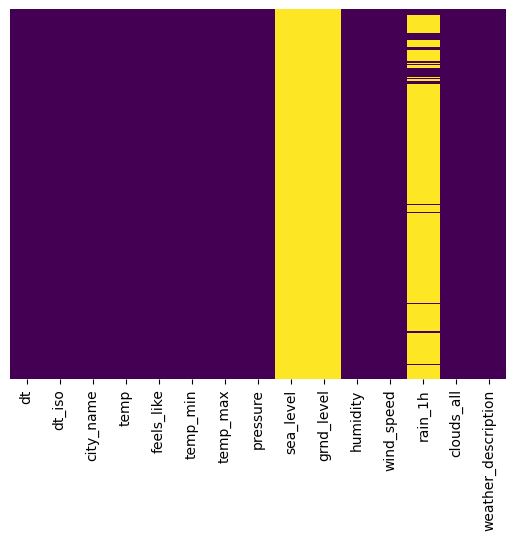

In [76]:
# sns.heatmap(meteo_treino.isnull(), yticklabels=False, cbar=False, cmap='viridis')
sns.heatmap(meteo_teste.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Drop *sea_level* and *grnd_level* do dataset de meteorologia
Iremos dropar estes 2 atributos porque não contém nenhum valor não nulo

In [77]:
meteo_treino.drop(['sea_level'], axis=1, inplace=True)
meteo_treino.drop(['grnd_level'], axis=1, inplace=True)

meteo_teste.drop(['sea_level'], axis=1, inplace=True)
meteo_teste.drop(['grnd_level'], axis=1, inplace=True)

In [78]:
# meteo_treino.head()
# meteo_teste.head()

### Fill with 0 *rain_1h* do dataset de meteorologia

Iremos colocar 0 nos valores nulos de *rain_1h* porque assumimos que não houve precipitação nos casos onde não há valor neste atributo.

In [79]:
# meteo_treino[meteo_treino['rain_1h'].isnull()].info()
# meteo_treino[meteo_treino['rain_1h'] == 0]

meteo_treino.fillna(0, inplace=True)
meteo_teste.fillna(0, inplace=True)


# meteo_treino.info()
meteo_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2256 entries, 0 to 503
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2256 non-null   int64  
 1   dt_iso               2256 non-null   object 
 2   city_name            2256 non-null   object 
 3   temp                 2256 non-null   float64
 4   feels_like           2256 non-null   float64
 5   temp_min             2256 non-null   float64
 6   temp_max             2256 non-null   float64
 7   pressure             2256 non-null   int64  
 8   humidity             2256 non-null   int64  
 9   wind_speed           2256 non-null   float64
 10  rain_1h              2256 non-null   float64
 11  clouds_all           2256 non-null   int64  
 12  weather_description  2256 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 246.8+ KB


<Axes: >

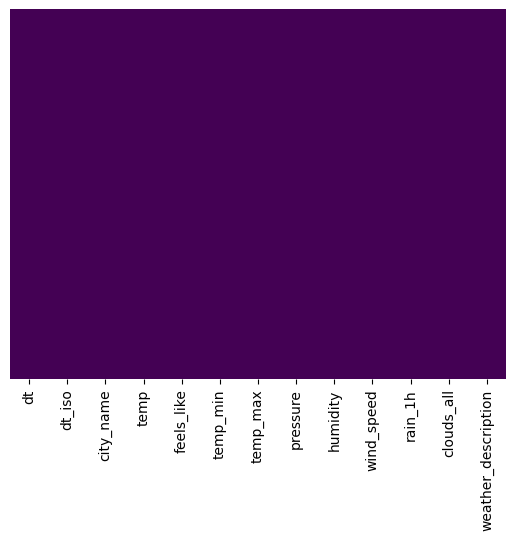

In [80]:
sns.heatmap(meteo_treino.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# sns.heatmap(meteo_teste.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [81]:
meteo_treino.nunique()
# meteo_teste.nunique()

dt                     11688
dt_iso                 11688
city_name                  1
temp                    2423
feels_like              2702
temp_min                 488
temp_max                 550
pressure                  41
humidity                  82
wind_speed               771
rain_1h                  372
clouds_all               101
weather_description        8
dtype: int64

##### Iremos remover a feature *city_name* porque o valor é único em todo o dataset

##### Iremos também remover a feature *dt* porque existe um valor único para cada registo do dataset e a feature *dt_iso* já possui informação sobre a data do registo.

In [82]:
meteo_treino.drop(['city_name'], axis=1, inplace=True)
meteo_teste.drop(['city_name'], axis=1, inplace=True)

meteo_treino.drop(['dt'], axis=1, inplace=True)
meteo_teste.drop(['dt'], axis=1, inplace=True)

In [83]:
# meteo_treino.info()
meteo_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2256 entries, 0 to 503
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt_iso               2256 non-null   object 
 1   temp                 2256 non-null   float64
 2   feels_like           2256 non-null   float64
 3   temp_min             2256 non-null   float64
 4   temp_max             2256 non-null   float64
 5   pressure             2256 non-null   int64  
 6   humidity             2256 non-null   int64  
 7   wind_speed           2256 non-null   float64
 8   rain_1h              2256 non-null   float64
 9   clouds_all           2256 non-null   int64  
 10  weather_description  2256 non-null   object 
dtypes: float64(6), int64(3), object(2)
memory usage: 211.5+ KB


## Tratamento de Datas (*dt_iso*)

In [84]:
meteo_treino['dt_iso'].head()
meteo_teste['dt_iso'].head()

0    2023-01-01 00:00:00 +0000 UTC
1    2023-01-01 01:00:00 +0000 UTC
2    2023-01-01 02:00:00 +0000 UTC
3    2023-01-01 03:00:00 +0000 UTC
4    2023-01-01 04:00:00 +0000 UTC
Name: dt_iso, dtype: object

In [85]:
meteo_treino['dt_iso'] = pd.to_datetime(meteo_treino['dt_iso'].str.split(" \+").str[0], format = "%Y-%m-%d %H:%M:%S", errors='coerce')
meteo_teste['dt_iso'] = pd.to_datetime(meteo_teste['dt_iso'].str.split(" \+").str[0], format = "%Y-%m-%d %H:%M:%S", errors='coerce')

In [86]:
assert meteo_treino['dt_iso'].isnull().sum() == 0, 'missing record date'
assert meteo_teste['dt_iso'].isnull().sum() == 0, 'missing record date'

In [87]:
meteo_treino['dt_iso'].head()
# meteo_teste['dt_iso'].head()

# meteo_teste.info()

0   2021-09-01 00:00:00
1   2021-09-01 01:00:00
2   2021-09-01 02:00:00
3   2021-09-01 03:00:00
4   2021-09-01 04:00:00
Name: dt_iso, dtype: datetime64[ns]

Renomear o atributo **dt_iso** para **Data** para ficar consistente com o atributo do dataset de energia

In [88]:
meteo_treino.rename(columns={'dt_iso': 'Data'}, inplace=True)
meteo_teste.rename(columns={'dt_iso': 'Data'}, inplace=True)

In [89]:
meteo_treino.head()
# meteo_teste.head()

,Data,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-01 00:00:00,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,2021-09-01 01:00:00,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,2021-09-01 02:00:00,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,2021-09-01 03:00:00,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,2021-09-01 04:00:00,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


# Tratamento do dataset de energia

In [90]:
energia_treino.info()
energia_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    11016 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 602.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kW

#### Juntar as features *Data* e *Hora* em apenas um atributo e converter em *Datetime64*

In [91]:
energia_treino['Data'] = energia_treino['Data'] + ' ' + energia_treino['Hora'].astype(str)
energia_teste['Data'] = energia_teste['Data'] + ' ' + energia_teste['Hora'].astype(str)

#### Dropar a feature *Hora*

In [92]:
energia_treino.drop(['Hora'], axis=1, inplace=True)
energia_teste.drop(['Hora'], axis=1, inplace=True)

energia_treino.head()
# energia_teste.head()

,Data,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29 0,0.0,0.0,0.0,None
1,2021-09-29 1,0.0,0.0,0.0,None
2,2021-09-29 2,0.0,0.0,0.0,None
3,2021-09-29 3,0.0,0.0,0.0,None
4,2021-09-29 4,0.0,0.0,0.0,None


##### Converter a *string* para *datetime*

In [93]:
energia_treino['Data'] = pd.to_datetime(energia_treino['Data'], format = "%Y-%m-%d %H", errors='coerce')
energia_teste['Data'] = pd.to_datetime(energia_teste['Data'], format = "%Y-%m-%d %H", errors='coerce')

In [94]:
assert energia_treino['Data'].isnull().sum() == 0, 'missing record date'
assert energia_teste['Data'].isnull().sum() == 0, 'missing record date'

In [95]:
energia_treino.info()
energia_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  datetime64[ns]
 1   Normal (kWh)             11016 non-null  float64       
 2   Horário Económico (kWh)  11016 non-null  float64       
 3   Autoconsumo (kWh)        11016 non-null  float64       
 4   Injeção na rede (kWh)    11016 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 516.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   fl

In [96]:
energia_treino.head()
# energia_teste.head()

,Data,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29 00:00:00,0.0,0.0,0.0,None
1,2021-09-29 01:00:00,0.0,0.0,0.0,None
2,2021-09-29 02:00:00,0.0,0.0,0.0,None
3,2021-09-29 03:00:00,0.0,0.0,0.0,None
4,2021-09-29 04:00:00,0.0,0.0,0.0,None


## Obter os dados metereologicos entre 2022-3-15 e 2022-4-4

In [97]:
# start_datetime_22 = pd.to_datetime('2022-3-15 00:00:00')
# end_datetime_22 = pd.to_datetime('2022-4-4 23:00:00')

# meteo22_data = meteo_treino[(meteo_treino['Data'] >= start_datetime_22) & (meteo_treino['Data'] <= end_datetime_22)]
# meteo22_data

### Converter o ano de 2022 para 2023

In [98]:
# meteo22_data.loc[:,'Data'] = meteo22_data['Data'] + pd.DateOffset(years=1)
# meteo22_data

### Juntar os dados do ano de 2022 aos de 2023 entre as datas 2022-3-15 e 2022-4-4

In [99]:
# meteo_teste = pd.concat([meteo_teste, meteo22_data], axis=0)
# meteo_teste

## Merging the datasets

In [100]:
# energia_treino.head()
# meteo_treino.head()


#! Experimentar com outros tipos de merge
data_treino = pd.merge(energia_treino, meteo_treino, on='Data', how='left')
data_teste = pd.merge(energia_teste, meteo_teste, on='Data', how='left')

In [101]:
# data_treino.head()
data_teste.tail()

# data_treino.info()
# data_teste.info()

,Data,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
2251,2023-04-04 19:00:00,0.953,0.000,0.012,17.13,16.18,17.13,17.13,1016,49,0.86,0.0,5,clear sky
2252,2023-04-04 20:00:00,0.915,0.000,0.000,15.13,14.03,15.13,15.13,1017,51,1.71,0.0,2,clear sky
2253,2023-04-04 21:00:00,0.479,0.000,0.000,13.13,11.83,13.13,13.13,1018,51,2.00,0.0,2,clear sky
2254,2023-04-04 22:00:00,0.000,0.497,0.000,11.13,9.63,11.13,14.75,1019,51,2.23,0.0,2,clear sky
2255,2023-04-04 23:00:00,0.000,0.487,0.000,12.97,11.60,11.13,15.62,1019,49,2.51,0.0,2,clear sky


In [102]:
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   temp                     2256 non-null   float64       
 5   feels_like               2256 non-null   float64       
 6   temp_min                 2256 non-null   float64       
 7   temp_max                 2256 non-null   float64       
 8   pressure                 2256 non-null   int64         
 9   humidity                 2256 non-null   int64         
 10  wind_speed               2256 non-null   float64       
 11  rain_1h                  2256 non-null   float64       
 12  clouds_all               2256 non-

# Criação de ficheiros com os dados de treino e teste

In [103]:
data_treino.to_csv('dataset_treino.csv', index=False)
data_teste.to_csv('dataset_teste.csv', index=False)